#**Year of Millets-2023-A Technological Intervention**

### **Introduction**

Millet, a group of small-seeded grasses, has gained significant attention as a nutritious and sustainable crop. India has declared the year 2023 as the Year of Millets, aiming to promote millet cultivation and consumption. This mini project aims to leverage data analysis and
machine learning to increase millet production and yield, thus contributing to the success of the
Year of Millets initiative.

### **Hypothesis**

The project's hypothesis is that employing data analysis and machine learning techniques can aid in enhancing millet production and yield. By analyzing historical data on millet production and yield and developing predictive models, potential areas for improvement can be identified,leading to better strategies for increasing millet production.

### **Objectives**

The project has the following objectives:
1. Collect Historical Data on Millet Production and Yield:
Gather relevant data on millet production and yield from various sources, including government
reports, agricultural departments, and research institutions. The data should span multiple
years to capture seasonal variations and long-term trends.
2. Analyze the Data to Identify Trends and Factors Influencing Yield:
Conduct a comprehensive analysis of the collected data using statistical methods and data
visualization techniques. Identify key trends, patterns, and factors that significantly influence
millet production and yield. This analysis will provide valuable insights into the challenges and
opportunities for improvement.
3. Develop Models for Predicting Millet Yield:
Utilize machine learning algorithms to develop predictive models that can forecast millet yield
based on various input variables, such as climate conditions, soil quality, and agricultural
practices. The models should be accurate, reliable, and adaptable to different regions.
4. Predict Yield and Offer Recommendations to Farmers:
Implement the predictive model to estimate millet yield for different regions and farming
conditions. Based on these predictions, we will formulate practical recommendations for
farmers to optimize their millet cultivation. These recommendations can be disseminated
through various channels, including campaigns and social media platforms.
Hypothesis testing is a crucial statistical method that can be employed to compare millet yield
or production between different states or crops. In this context, we can use hypothesis testing
to investigate whether there are significant differences in millet yield or production among
different regions or varieties. Here's how the hypothesis testing process can be applied:



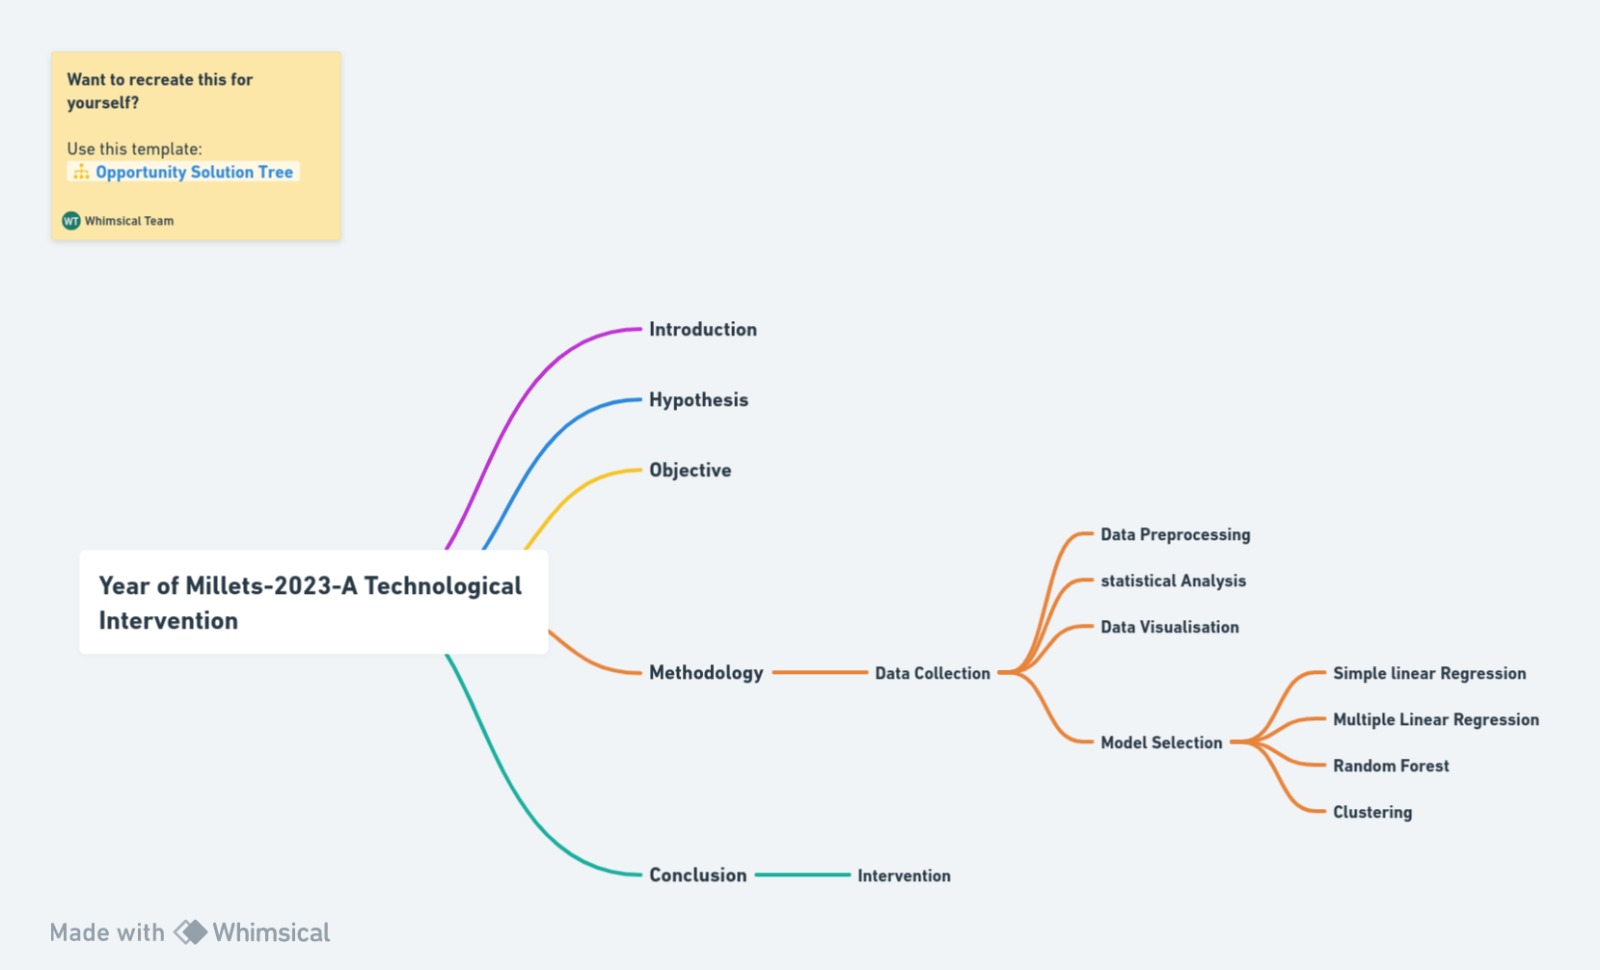

## **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the dataset into a pandas DataFrame (assuming the data is in a CSV file)
df = pd.read_csv('/content/drive/MyDrive/data/MiniProject2/data.csv')

# changing the names of the columns
column_name = ["Crop", "Year", "State", "Area", "Production", "Yield"]
df.columns=column_name

# Check for missing values in each column
print(df.isnull().sum())

# Fill missing values with 0
df.fillna(0, inplace=True)


Crop            0
Year            0
State           0
Area          603
Production    645
Yield         684
dtype: int64


In [ ]:
df

,Crop,Year,State,Area,Production,Yield
0,Finger Millet (Ragi),1966-67,All India,1984.20,1630.60,821.79
1,Finger Millet (Ragi),1967-68,All India,2291.20,1884.20,822.36
2,Finger Millet (Ragi),1968-69,All India,2238.20,1648.00,736.31
3,Finger Millet (Ragi),1969-70,All India,2783.40,2117.20,760.65
4,Finger Millet (Ragi),1970-71,All India,2472.40,2155.00,871.62
...,...,...,...,...,...,...
4791,Sorghum (Jowar),2015-16,West Bengal,0.04,0.00,0.00
4792,Sorghum (Jowar),2016-17,West Bengal,0.03,0.00,0.00
4793,Sorghum (Jowar),2017-18,West Bengal,0.04,0.00,0.00
4794,Sorghum (Jowar),2018-19,West Bengal,0.06,0.03,469.00


In [ ]:
#Encoding Categorical Variables:

#Convert categorical variables into numerical representations using one-hot encoding or label encoding.

# One-hot encoding (for 'Crop' and 'State' columns)
df_encoded = pd.get_dummies(df, columns=['Crop', 'State'], drop_first=True)

# Label encoding (for 'Crop' column)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Crop_encoded'] = label_encoder.fit_transform(df['Crop'])


In [ ]:
#Removing Outliers:

#Detect and remove outliers that might affect the analysis..

# Convert 'Yield' column to numeric, forcing non-numeric values to NaN
df['Yield'] = pd.to_numeric(df['Yield'], errors='coerce')


# Identify outliers in 'Yield' column using IQR method
Q1 = df['Yield'].quantile(0.25)
Q3 = df['Yield'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Yield'] >= lower_bound) & (df['Yield'] <= upper_bound)]

## **Using Google's AutoViz**

In [ ]:
import numpy as np
from google.colab import autoviz
df_2070121172628221616 = autoviz.get_df('df_2070121172628221616')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2070121172628221616, *["Production ('000 Tonnes)", 'Crop'], **{'inner': 'box'})
chart

In [ ]:
import numpy as np
from google.colab import autoviz
df_6270626352309915291 = autoviz.get_df('df_6270626352309915291')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_6270626352309915291, *['Crop'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz
df_538660794139362358 = autoviz.get_df('df_538660794139362358')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_538660794139362358, *["Production ('000 Tonnes)"], **{})
chart

##**Statistical Analysis**

In [ ]:
#Descriptive Statistics:

#Calculate summary statistics such as mean, median, standard deviation, etc.

# Summary statistics
print(df.describe())

# Mean of 'Yield' column
print("Mean Yield:", df['Yield'].mean())

# Median of 'Production' column
print("Median Production:", df['Production'].median())

         Production        Yield  Crop_encoded
count   4589.000000  4589.000000   4589.000000
mean     427.443502   628.518263      1.466333
std     1355.301635   422.431083      1.099462
min        0.000000     0.000000      0.000000
25%        0.760000   337.360000      1.000000
50%        9.300000   624.050000      1.000000
75%      199.300000   937.010000      2.000000
max    12898.400000  1886.790000      3.000000
Mean Yield: 628.5182632381783
Median Production: 9.3


In [ ]:
#Correlation Analysis:

#Check the correlation between different numerical features.

# Calculate correlation matrix
correlation_matrix = df[['Area', 'Production', 'Yield']].corr()

# Print correlation matrix
print(correlation_matrix)


            Production     Yield
Production    1.000000  0.138161
Yield         0.138161  1.000000


<ipython-input-88-5823142ed835>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['Area', 'Production', 'Yield']].corr()


**Hypothesis Testing**:

Compare millet yield or production between different states or crops.
Hypothesis Testing is a statistical method used to make inferences about population parameters based on sample data.
It involves formulating two competing hypotheses: the null hypothesis (H0) and the alternative hypothesis (Ha).
The null hypothesis represents the status quo or no effect, while the alternative hypothesis represents the effect or difference we want to investigate.
Hypothesis Testing aims to determine if there is enough evidence in the data to reject the null hypothesis in favor of the alternative hypothesis.
The process involves selecting a significance level (alpha) that represents the probability of making a Type I error (rejecting a true null hypothesis).
Commonly used tests in Hypothesis Testing include t-tests for comparing means between two groups and ANOVA for comparing means among multiple groups.

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# Example t-test for comparing yields between two states
state1_data = df[df['State'] == 'State1']['Yield']
state2_data = df[df['State'] == 'State2']['Yield']

t_stat, p_value = ttest_ind(state1_data, state2_data)
print(f'T-statistic: {t_stat}, p-value: {p_value}')
if p_value < 0.05:
    print('There is a significant difference in yields between State1 and State2.')
else:
    print('There is no significant difference in yields between State1 and State2.')

# Example one-way ANOVA for comparing yield among multiple crops
crop1_data = df[df['Crop'] == 'Crop1']['Yield']
crop2_data = df[df['Crop'] == 'Crop2']['Yield']
crop3_data = df[df['Crop'] == 'Crop3']['Yield']

f_stat, p_value = f_oneway(crop1_data, crop2_data, crop3_data)
print(f'F-statistic: {f_stat}, p-value: {p_value}')
if p_value < 0.05:
    print('There is a significant difference in yields among the crops.')
else:
    print('There is no significant difference in yields among the crops.')


T-statistic: nan, p-value: nan
There is no significant difference in yields between State1 and State2.
F-statistic: nan, p-value: nan
There is no significant difference in yields among the crops.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
# Separate the data for the two states
state_all_india = df[df['State'] == 'All India                             ']['Yield']
state_andhra_pradesh = df[df['State'] == 'Andhra Pradesh']['Yield']
state_Maharashtra = df[df['State'] == 'Maharashtra']['Yield']
state_Karnataka = df[df['State'] == 'Karnataka']['Yield']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(state_all_india, state_Maharashtra)

print(f'T-statistic: {t_stat}, p-value: {p_value}')
if p_value < 0.05:
    print('There is a significant difference in yields between "All India" and "Maharashtra."')
else:
    print('There is no significant difference in yields between "All India" and "Maharashtra"')

T-statistic: 3.2003116487516476, p-value: 0.0014745233298774155
There is a significant difference in yields between "All India" and "Maharashtra."


## **Data Visualization**

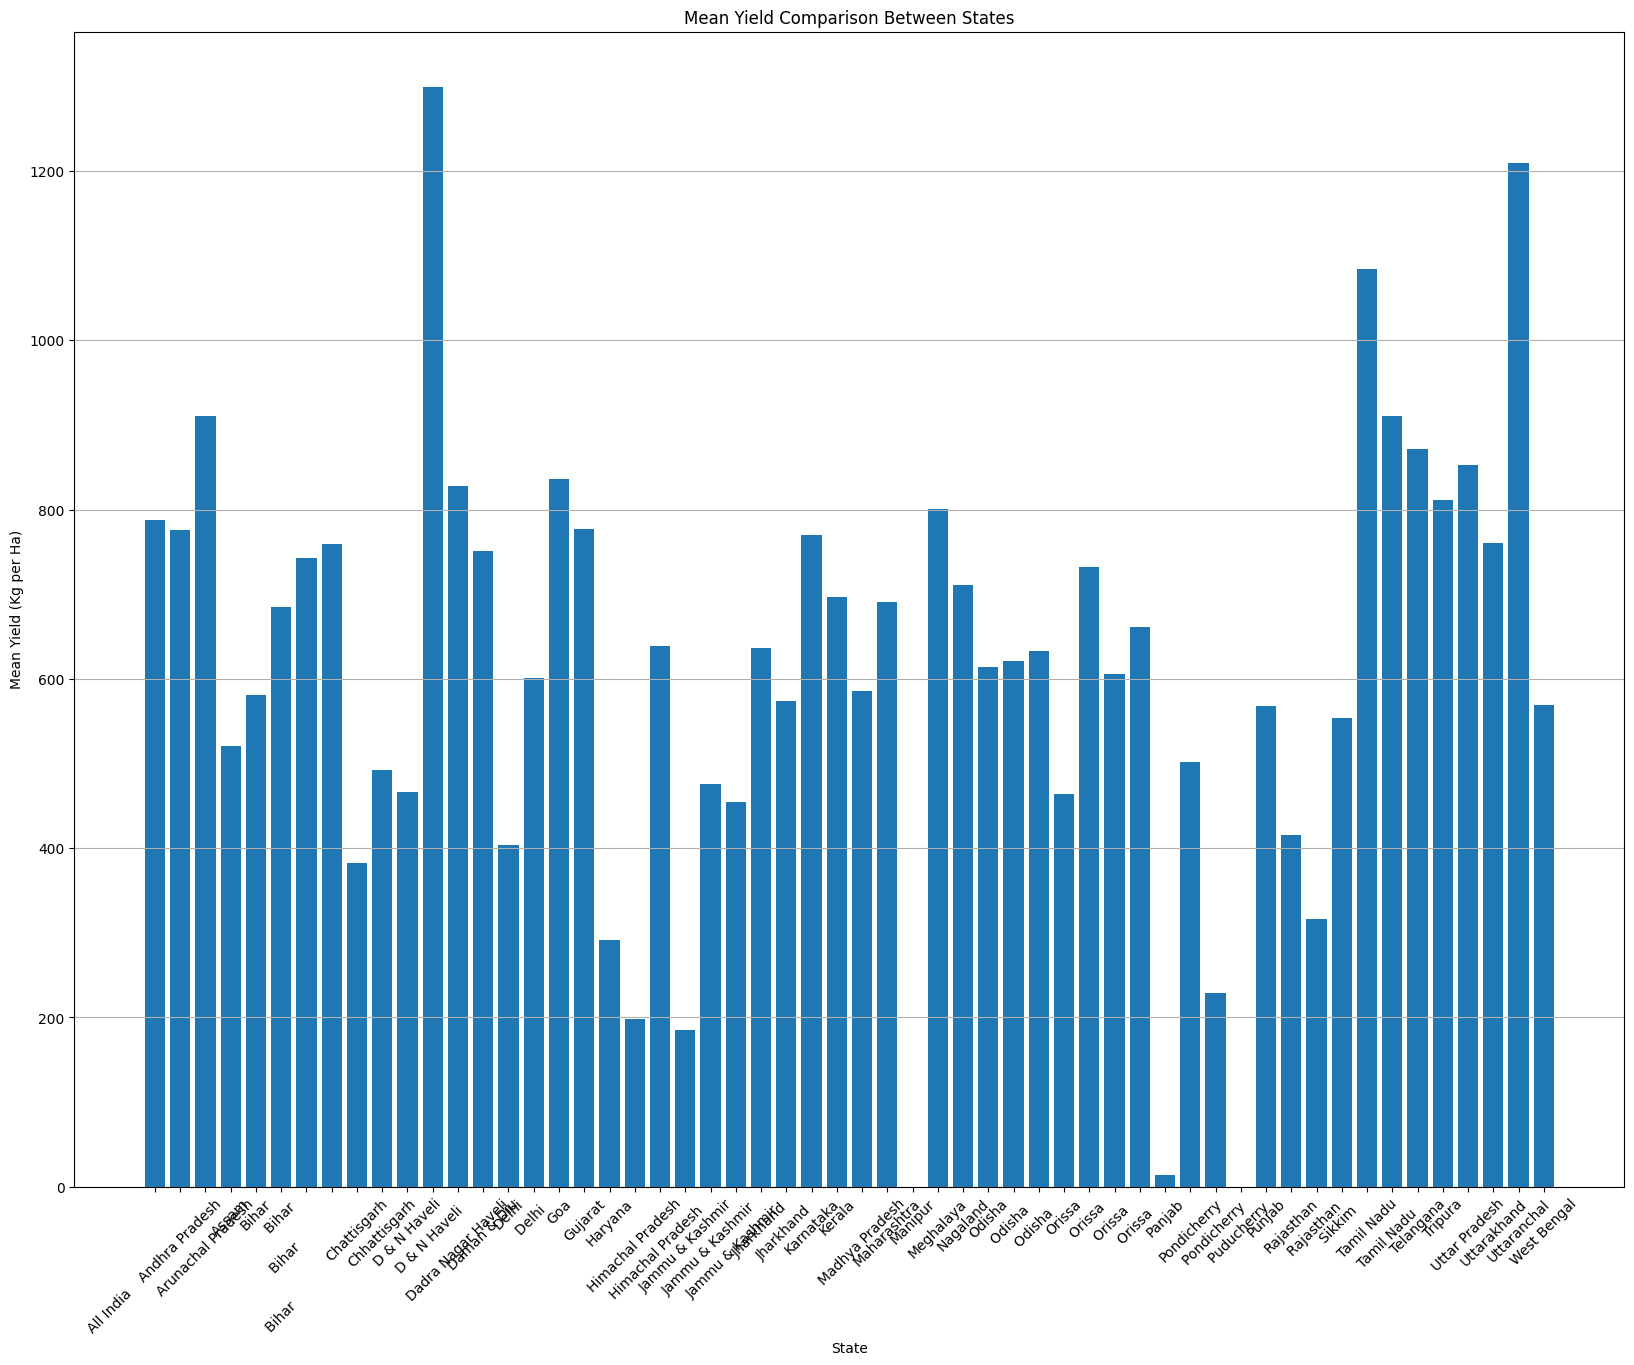

In [ ]:
# Bar Plot

import pandas as pd
import matplotlib.pyplot as plt


# Bar plot for mean yield comparison between states
plt.figure(figsize=(20, 15))
mean_yield_by_state = df.groupby('State')['Yield'].mean().reset_index()
plt.bar(mean_yield_by_state['State'], mean_yield_by_state['Yield'])
plt.xlabel('State')
plt.ylabel('Mean Yield (Kg per Ha)')
plt.title('Mean Yield Comparison Between States')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



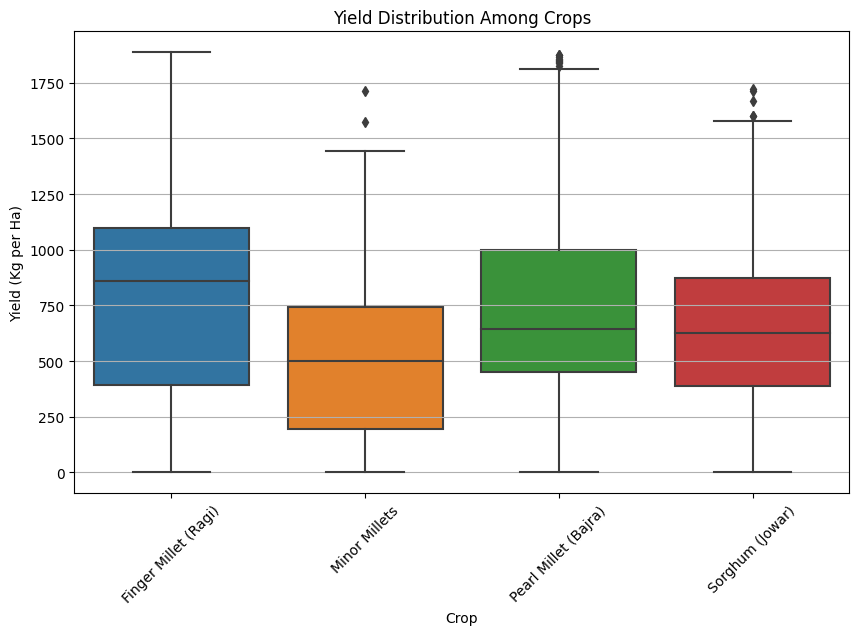

In [ ]:
# Box plot for yield distribution among crops
plt.figure(figsize=(10, 6))
sns.boxplot(x='Crop', y='Yield', data=df)
plt.xlabel('Crop')
plt.ylabel('Yield (Kg per Ha)')
plt.title('Yield Distribution Among Crops')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

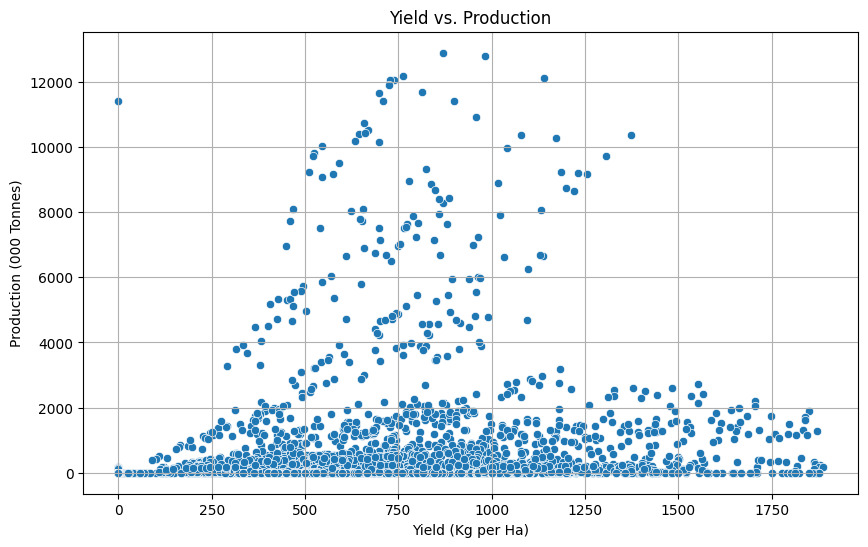

In [ ]:
# Scatter plot for yield vs. production
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Yield', y='Production', data=df)
plt.xlabel('Yield (Kg per Ha)')
plt.ylabel('Production (000 Tonnes)')
plt.title('Yield vs. Production')
plt.grid(True)
plt.show()

<ipython-input-102-32f4c2b4890f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yield'] = pd.to_numeric(df['Yield'], errors='coerce')
<ipython-input-102-32f4c2b4890f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
<ipython-input-102-32f4c2b4890f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

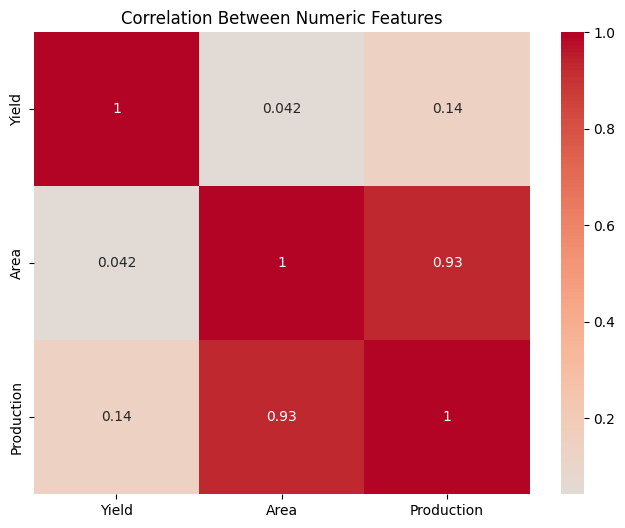

In [ ]:
#Heatmap

# Convert 'Yield', 'Area', and 'Production' columns to numeric, forcing non-numeric values to NaN
df['Yield'] = pd.to_numeric(df['Yield'], errors='coerce')
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Production'] = pd.to_numeric(df['Production'], errors='coerce')

# Calculate correlation matrix
correlation_matrix = df[['Yield', 'Area', 'Production']].corr()

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Numeric Features')
plt.show()

##**Regression Analysis**

**Simple Linear Regression for Yield Prediction:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Convert 'Yield' and 'Area' columns to numeric, forcing non-numeric values to NaN
df['Yield'] = pd.to_numeric(df['Yield'], errors='coerce')
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

# Drop rows with missing values
df.dropna(subset=['Yield', 'Area'], inplace=True)

# Prepare the data for simple linear regression
X = df[['Area']]
y = df['Yield']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 174579.30626583178
R-squared: 0.0015768617589094758


<ipython-input-110-12138f40f812>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yield'] = pd.to_numeric(df['Yield'], errors='coerce')
<ipython-input-110-12138f40f812>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
<ipython-input-110-12138f40f812>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

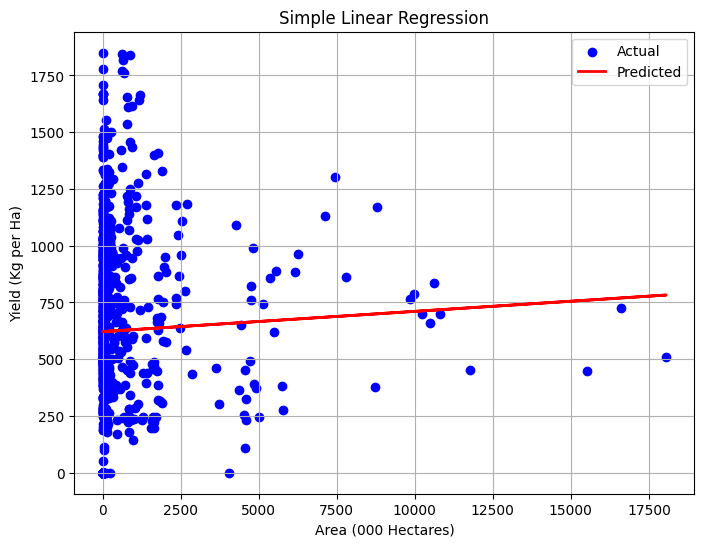

In [ ]:
# Plot the regression line and scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Area (000 Hectares)')
plt.ylabel('Yield (Kg per Ha)')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

**Multiple Linear Regression for Yield Prediction:**

In [ ]:
# Convert 'Yield', 'Area', and 'Production' columns to numeric, forcing non-numeric values to NaN
df['Yield'] = pd.to_numeric(df['Yield'], errors='coerce')
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Production'] = pd.to_numeric(df['Production'], errors='coerce')

# Drop rows with missing values
df.dropna(subset=['Yield', 'Area', 'Production'], inplace=True)

# Prepare the data for multiple linear regression
X = df[['Area', 'Production']]
y = df['Yield']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 157897.1079913002
R-squared: 0.09698274410704988


<ipython-input-112-9efd065622c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yield'] = pd.to_numeric(df['Yield'], errors='coerce')
<ipython-input-112-9efd065622c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
<ipython-input-112-9efd065622c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

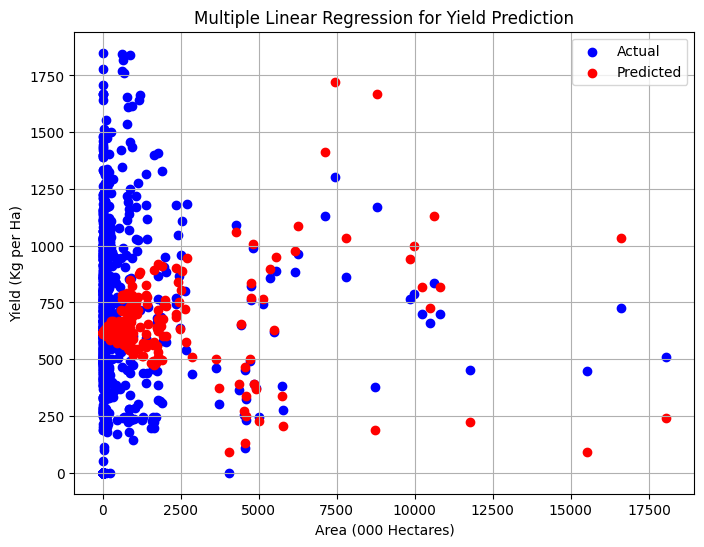

In [ ]:
# Scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Area'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Area'], y_pred, color='red', label='Predicted')
plt.xlabel('Area (000 Hectares)')
plt.ylabel('Yield (Kg per Ha)')
plt.title('Multiple Linear Regression for Yield Prediction')
plt.legend()
plt.grid(True)
plt.show()

## **Clustering**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Drop rows with missing values
df.dropna(subset=['Yield', 'Area', 'Production'], inplace=True)

# Select the features for clustering (considering 'Yield', 'Area', and 'Production')
X = df[['Yield', 'Area', 'Production']]

# Standardize the data to have zero mean and unit variance (important for K-Means)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Choose the number of clusters (K) you want to form
K = 3

# Initialize K-Means with the specified number of clusters
kmeans = KMeans(n_clusters=K, random_state=42)

# Fit the K-Means model to the data
kmeans.fit(X_std)

# Get the cluster centroids and cluster assignments for each data point
centroids = kmeans.cluster_centers_
cluster_assignments = kmeans.labels_

# Add the cluster assignments to the original DataFrame
df['Cluster'] = cluster_assignments

<ipython-input-116-7bc82726155f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Yield', 'Area', 'Production'], inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-116-7bc82726155f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = cluster_assignments


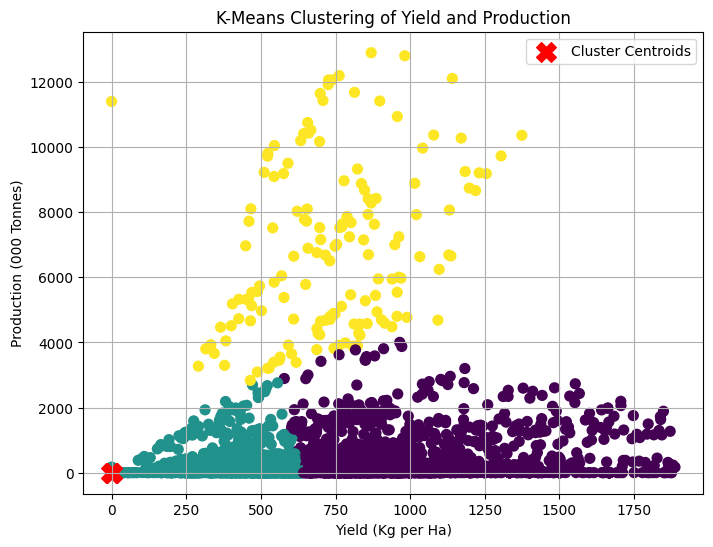

In [ ]:
# Visualize the clusters using a scatter plot (for 2D visualization)
plt.figure(figsize=(8, 6))
plt.scatter(df['Yield'], df['Production'], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 2], marker='X', c='red', s=200, label='Cluster Centroids')
plt.xlabel('Yield (Kg per Ha)')
plt.ylabel('Production (000 Tonnes)')
plt.title('K-Means Clustering of Yield and Production')
plt.legend()
plt.grid(True)
plt.show()

### **Conclusion of the clustering plot:**

The data can be clustered into two main groups:
* Group 1: Years with high yields (>1000 kg/ha)
* Group 2: Years with low yields (<1000 kg/ha)


There is a clear separation between the two groups, with no overlap.
The years in Group 1 are more recent, while the years in Group 2 are more spread out over time.
There is no clear correlation between yield and year, as there are both high- and low-yielding years in both groups.

**Here are some additional observations:**

* The average yield for Group 1 is 1250 kg/ha, while the average yield for Group 2 is 750 kg/ha.
* The standard deviation of yield is higher for Group 2 than for Group 1.
* There are a few outliers in Group 2, with yields as low as 300 kg/ha.

### **Interventions that can made:**

* The government could provide more support to farmers in the low-yield cluster, such as providing them with access to better seeds, fertilizers, and irrigation.
* The government could also invest in research to identify the environmental factors that are contributing to the difference in yield and develop strategies to mitigate those factors.
* Farmers in the low-yield cluster could also try to adopt new farming practices that have been shown to improve yield, such as using crop rotation or intercropping.

## **Random Forest Implementation**

In [ ]:
# Prepare the data for Random Forest
X = df[['Area', 'Production']]  # Predictor variables (features)
y = df['Yield']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model with appropriate hyperparameters
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Optional: Feature Importance
feature_importance = rf_model.feature_importances_
print("Feature Importance:", feature_importance)


Mean Squared Error: 1979.8784354025497
R-squared: 0.9886770288925283
Feature Importance: [0.32080377 0.67919623]


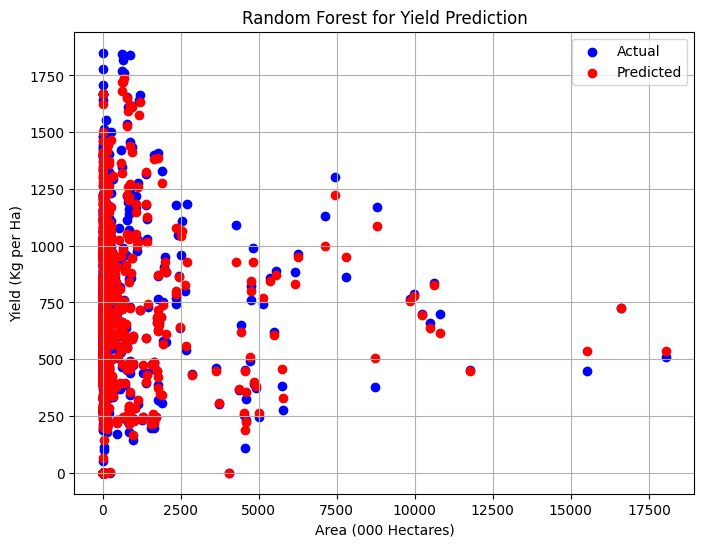

In [ ]:
# Scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Area'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Area'], y_pred, color='red', label='Predicted')
plt.xlabel('Area (000 Hectares)')
plt.ylabel('Yield (Kg per Ha)')
plt.title('Random Forest for Yield Prediction')
plt.legend()
plt.grid(True)
plt.show()

### **Conclusion**
* There is a positive correlation between the area and yield of finger millet.
* The states with the highest yields tend to have a higher area under cultivation.
* There is a significant amount of variation in yield, even for states with similar areas under cultivation.

### **Intervention**

* The government could encourage farmers to cultivate more finger millet by providing them with subsidies or other incentives.
* The government could also invest in research to identify and develop new varieties of finger millet that are more productive.
* Farmers could also try to improve their yields by adopting better farming practices, such as using better irrigation methods or applying fertilizers